In [ ]:
2import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 2003~2024 데이터 전처리
=> 전국 관객수 10000명 기준으로 리사이징

In [ ]:
# 데이터 값 읽어오기
data_file = "./KOBIS_개봉일람_2023-03-23.csv"
df = pd.read_csv(data_file, encoding='UTF-8',index_col = "순번")

### 생략된 내용을 추가로 보는 코드

In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 200)
# col 생략 없이 출력
pd.set_option('display.max_columns', 200)

In [ ]:
# 널값 확인
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19901,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19902,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 빈값 확인

df.isnull().sum()

영화명            0
감독          1298
제작사        12618
수입사         8178
배급사           76
개봉일            2
영화유형           0
영화형태           1
국적             1
전국 스크린수        0
전국 매출액        44
전국 관객수         0
서울 매출액        50
서울 관객수         0
장르            71
등급             5
영화구분           0
dtype: int64

In [ ]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19904 entries, 1 to 19904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19904 non-null  object
 1   감독       18606 non-null  object
 2   제작사      7286 non-null   object
 3   수입사      11726 non-null  object
 4   배급사      19828 non-null  object
 5   개봉일      19902 non-null  object
 6   영화유형     19904 non-null  object
 7   영화형태     19903 non-null  object
 8   국적       19903 non-null  object
 9   전국 스크린수  19904 non-null  object
 10  전국 매출액   19860 non-null  object
 11  전국 관객수   19904 non-null  object
 12  서울 매출액   19854 non-null  object
 13  서울 관객수   19904 non-null  object
 14  장르       19833 non-null  object
 15  등급       19899 non-null  object
 16  영화구분     19904 non-null  object
dtypes: object(17)
memory usage: 2.7+ MB


In [ ]:
# 제작사, 수입사는 결측치가 너무 많아, drop
# 나머지 결측치는 기타로 변경

df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

# 한개가 결측치가 나와서 기타로 치환
df['국적'].fillna('기타', inplace=True)

# 서울 매출액 결측치 제거(사용을 안하니깨문에 0으로 변경)
df['서울 매출액'].fillna(0, inplace=True)
# 남은 결측치 제거

for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)

for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)

for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)

In [ ]:
# 최종확인

df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        0
영화유형       0
영화형태       0
국적         0
전국 스크린수    0
전국 매출액     0
전국 관객수     0
서울 매출액     0
서울 관객수     0
장르         0
등급         0
영화구분       0
dtype: int64

In [ ]:
# 범주형 데이터 값 확인

category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19484
컬럼 [감독] UNIQUE : 7876
컬럼 [배급사] UNIQUE : 1357
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 18
컬럼 [영화구분] UNIQUE : 2


In [ ]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [ ]:
# 다수의 배급사를 앞에 있는 배급사로 취급

for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [ ]:
# 영화유형은 두개 뿐이라 제거

df.drop('영화유형', axis=1, inplace=True)

In [ ]:
# 등급 데이터 전처리

for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가': 
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854 entries, 1 to 19904
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19854 non-null  object
 1   감독       19854 non-null  object
 2   배급사      19854 non-null  object
 3   개봉일      19854 non-null  object
 4   영화형태     19854 non-null  object
 5   국적       19854 non-null  object
 6   전국 스크린수  19854 non-null  object
 7   전국 매출액   19854 non-null  object
 8   전국 관객수   19854 non-null  object
 9   서울 매출액   19854 non-null  object
 10  서울 관객수   19854 non-null  object
 11  장르       19854 non-null  object
 12  등급       19854 non-null  object
 13  영화구분     19854 non-null  object
dtypes: object(14)
memory usage: 2.8+ MB


In [ ]:
df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

df['전국 스크린수'] = df['전국 스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 스크린수'] = df['전국 스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')


In [ ]:
# 변경 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854 entries, 1 to 19904
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19854 non-null  object
 1   감독       19854 non-null  object
 2   배급사      19854 non-null  object
 3   개봉일      19854 non-null  object
 4   영화형태     19854 non-null  object
 5   국적       19854 non-null  object
 6   전국 스크린수  19854 non-null  int64 
 7   전국 매출액   19854 non-null  int64 
 8   전국 관객수   19854 non-null  int64 
 9   서울 매출액   19854 non-null  object
 10  서울 관객수   19854 non-null  object
 11  장르       19854 non-null  object
 12  등급       19854 non-null  object
 13  영화구분     19854 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.8+ MB


In [ ]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize = df[(df['전국 관객수'] > 10000)]
movie_resize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 1 to 4867
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4835 non-null   object
 1   감독       4835 non-null   object
 2   배급사      4835 non-null   object
 3   개봉일      4835 non-null   object
 4   영화형태     4835 non-null   object
 5   국적       4835 non-null   object
 6   전국 스크린수  4835 non-null   int64 
 7   전국 매출액   4835 non-null   int64 
 8   전국 관객수   4835 non-null   int64 
 9   서울 매출액   4835 non-null   object
 10  서울 관객수   4835 non-null   object
 11  장르       4835 non-null   object
 12  등급       4835 non-null   object
 13  영화구분     4835 non-null   object
dtypes: int64(3), object(11)
memory usage: 566.6+ KB


In [ ]:
# 값 내보내기
movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

### 배급사 추가로 변경 더 해야 해

In [ ]:
# 점수 처리를 위해 변경

movie_resize['배급사'] = movie_resize['배급사'].str.replace('CJ ENM','(주)씨제이이엔엠')

In [ ]:
# 국적 데이터 변경
for idx, row in movie_resize.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize['국적'][idx] = '기타'

In [ ]:
# 값 확인

movie_resize['국적'].value_counts()

# 리사이징 된 데이터 불러오기

In [ ]:
# df = movie_resize2 
data_file = "./movie_resize2.csv"
df = pd.read_csv(data_file, encoding='UTF-8')

In [ ]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     4642 non-null   object
 1   감독      4642 non-null   object
 2   배급사     4642 non-null   object
 3   개봉일     4642 non-null   object
 4   영화형태    4642 non-null   object
 5   국적      4642 non-null   object
 6   전국스크린수  4642 non-null   int64 
 7   전국 매출액  4642 non-null   int64 
 8   전국 관객수  4642 non-null   int64 
 9   장르      4642 non-null   object
 10  등급      4642 non-null   object
 11  영화구분    4642 non-null   object
dtypes: int64(3), object(9)
memory usage: 435.3+ KB


# 연도, 월 컬럼 추가하기

## datetime 방법

In [ ]:
import datetime
df['개봉일']= pd.to_datetime(df['개봉일']) # 개봉일 datetime타입으로 바꿈
df['연도'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      4835 non-null   object        
 1   감독       4835 non-null   object        
 2   배급사      4835 non-null   object        
 3   개봉일      4835 non-null   datetime64[ns]
 4   영화형태     4835 non-null   object        
 5   국적       4835 non-null   object        
 6   전국 스크린수  4835 non-null   int64         
 7   전국 매출액   4835 non-null   int64         
 8   전국 관객수   4835 non-null   int64         
 9   서울 매출액   4835 non-null   object        
 10  서울 관객수   4835 non-null   object        
 11  장르       4835 non-null   object        
 12  등급       4835 non-null   object        
 13  영화구분     4835 non-null   object        
 14  연도       4835 non-null   int64         
 15  월        4835 non-null   int64         
 16  계절       4835 non-null   object        
dtypes: datetime64[ns](1), int64(5), o

In [ ]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,2019,4,봄


In [ ]:
df['연도'].unique()

array([2014, 2019, 2017, 2009, 2015, 2006, 2012, 2013, 2022, 2005, 2018,
       2004, 2016, 2003, 2007, 2008, 2011, 2021, 2010, 2002, 2020, 2023,
       1977])

In [ ]:
df[df['연도'] == 1977]

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
1056,로보트 태권 V,김청기,기타,1977-04-08,장편,한국,0,0,705207,0,"143,407",SF,전체관람가,일반영화,1977,4,봄


In [ ]:
df[df['연도'] == 2002]

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
111,반지의 제왕 : 두개의 탑,피터 잭슨,워너브러더스 코리아(주),2002-12-19,장편,미국,0,0,5183000,0,"836,065",액션,12세관람가,일반영화,2002,12,겨울
167,색즉시공,윤제균,(주)쇼박스,2002-12-11,장편,한국,0,0,4082797,0,"538,798",코미디,청소년관람불가,일반영화,2002,12,겨울
173,해리포터와 비밀의 방,크리스 콜럼버스,워너브러더스 코리아(주),2002-12-13,장편,미국,0,0,4000000,0,"320,084",드라마,전체관람가,일반영화,2002,12,겨울
250,광복절 특사,김상진,(주)시네마서비스,2002-11-20,장편,한국,0,0,3101900,0,"41,152",드라마,15세관람가,일반영화,2002,11,가을
541,품행제로,조근식,영화사청어람(주),2002-12-26,장편,한국,0,0,1694637,0,"437,218",코미디,15세관람가,일반영화,2002,12,겨울
2645,H(에이치),이종혁,에이라인,2002-12-19,장편,한국,0,0,90000,0,"11,788",스릴러,15세관람가,일반영화,2002,12,겨울
2965,죽어도 좋아,박진표,영화사청어람(주),2002-12-05,장편,한국,0,0,60666,0,0,드라마,청소년관람불가,독립/예술영화,2002,12,겨울


## 참고 split방법

In [ ]:
# def extract_year(row):
#   return row.split('-')[0]
# df['연도2'] = df['개봉일'].apply(extract_year)

In [ ]:
# df['연도2'].unique()

array(['2014', '2019', '2017', '2009', '2015', '2006', '2012', '2013',
       '2022', '2005', '2018', '2004', '2016', '2003', '2007', '2008',
       '2011', '2021', '2010', '2020', '2023', '1977'], dtype=object)

In [ ]:
# print(df[df['연도2'] == '1977'])

           영화명   감독 배급사         개봉일 영화형태  국적  전국스크린수  전국 매출액  전국 관객수  장르  \
1016  로보트 태권 V  김청기  기타  1977-04-08   장편  한국       0       0  705207  SF   

         등급  영화구분   연도2  
1016  전체관람가  일반영화  1977  


# 계절 컬럼 추가하기

* 나중에 원-핫인코딩 할 거야

In [ ]:
season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

In [ ]:
df['계절'] = df[['월']].apply(lambda x : x.map(season))

In [ ]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,2019,4,봄


In [ ]:
df['계절'].value_counts()

가을    1276
겨울    1250
봄     1169
여름    1140
Name: 계절, dtype: int64

# 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,946 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

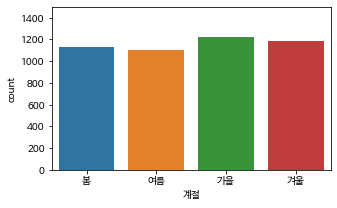

In [ ]:
# 계절 별 흥행 영화 카운트
plt.rc('font', family='NanumBarunGothic') 

season_order = ['봄', '여름', '가을', '겨울']
# df['계절'] = df['계절'].loc[season_order] 
# ordered_index = df['계절'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
plt.ylim([0, 1500])      # X축의 범위: [xmin, xmax]
plt.yticks()
sns.countplot(data = df, x = '계절', order=season_order)
plt.show()

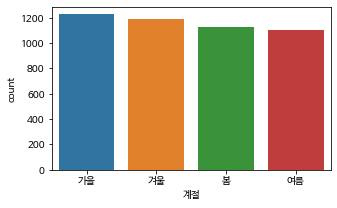

In [ ]:
# 계절 별 흥행 영화 카운트
plt.rc('font', family='NanumBarunGothic') 

ordered_index = df['계절'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = '계절', order=ordered_index)
plt.show()

<Axes: xlabel='계절', ylabel='count'>

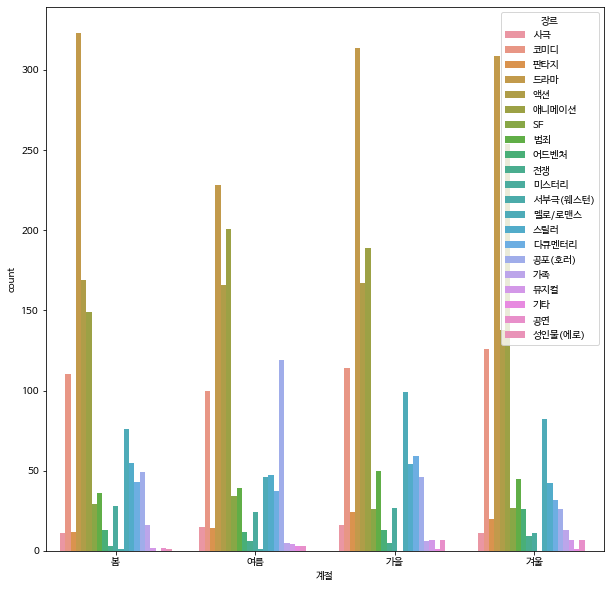

In [ ]:
# 계절 별 흥행 영화 장르
plt.rc('font', family='NanumBarunGothic') 

season_order = ['봄', '여름', '가을', '겨울']

plt.figure(figsize=(10, 10))
sns.countplot(data = df, x='계절', hue = '장르', order=season_order)

# 정규화 및 표준화

## 연도별 관객수 분포 시각화 해보기

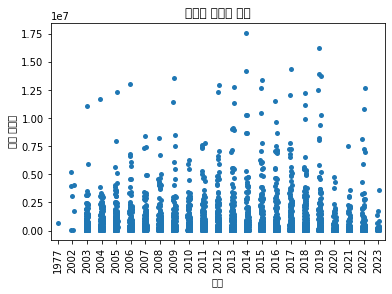

In [ ]:
#연도별 관객수
plt.rc('font', family='NanumBarunGothic')
sns.stripplot(x='연도', y='전국 관객수', data=df, jitter=True)
plt.title("연도별 관객수 분포")

# plt.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90)
plt.show()

## 표준화 구현 코드
X_ = (X-X.mean())/X.std()

In [ ]:
# 표준화 함수 구현
def standard(data):
  data =  (data-data.mean())/data.std()
  return data

In [ ]:
df['표준화_관객수'] = standard(df['전국 관객수'])

In [ ]:
df.head()

### 연도별 최대, 최소, 평균, 표준편차 확인

In [ ]:
# 연도별 최대값
df.groupby('연도')['전국 관객수'].max()

연도
1977      705207
2002     5183000
2003    11081000
2004    11746135
2005    12302831
2006    13019740
2007     8426973
2008     8245523
2009    13624328
2010     6282774
2011     7784807
2012    12983330
2013    12811206
2014    17613682
2015    13395400
2016    11565078
2017    14410754
2018    12253247
2019    16264944
2020     4750104
2021     7551990
2022    12692959
2023     3638498
Name: 전국 관객수, dtype: int64

In [ ]:
df.groupby('연도')['전국 관객수'].std()

연도
1977             NaN
2002    2.026921e+06
2003    1.168770e+06
2004    1.136663e+06
2005    1.414245e+06
2006    1.392055e+06
2007    1.186963e+06
2008    1.174967e+06
2009    1.601408e+06
2010    1.008252e+06
2011    1.314934e+06
2012    1.661566e+06
2013    1.783466e+06
2014    1.925119e+06
2015    1.762162e+06
2016    1.636801e+06
2017    1.641256e+06
2018    1.569395e+06
2019    2.064275e+06
2020    6.720722e+05
2021    7.878549e+05
2022    1.612390e+06
2023    7.115511e+05
Name: 전국 관객수, dtype: float64

In [ ]:
df.groupby('연도')['전국 관객수'].min()

연도
1977    705207
2002     60666
2003     10382
2004     10294
2005     10351
2006     10018
2007     10107
2008     10424
2009     10393
2010     10023
2011     10023
2012     10075
2013     10328
2014     10119
2015     10031
2016     10646
2017     10039
2018     10074
2019     10021
2020     10060
2021     10079
2022     10041
2023     10329
Name: 전국 관객수, dtype: int64

In [ ]:
df.groupby('연도')['전국 관객수'].mean()

연도
1977    7.052070e+05
2002    2.601857e+06
2003    5.890129e+05
2004    6.682612e+05
2005    7.959562e+05
2006    7.328591e+05
2007    6.864343e+05
2008    6.578454e+05
2009    7.102422e+05
2010    5.989023e+05
2011    6.753993e+05
2012    7.946544e+05
2013    8.171056e+05
2014    7.434581e+05
2015    7.378419e+05
2016    7.190884e+05
2017    7.015290e+05
2018    6.780377e+05
2019    7.498630e+05
2020    2.708938e+05
2021    3.109296e+05
2022    5.649537e+05
2023    3.301212e+05
Name: 전국 관객수, dtype: float64

### 연도별 표준화

In [ ]:
  years = df['연도'].unique()
  print(years)

[2014 2019 2017 2009 2015 2006 2012 2013 2022 2005 2018 2004 2016 2003
 2007 2008 2011 2021 2010 2002 2020 2023 1977]


In [ ]:
len(df)

4835

In [ ]:
 df.iterrows()

<generator object DataFrame.iterrows at 0x7f8d813709e0>

In [ ]:
#  df[(df['전국 관객수'] > 10000)]
cnt = 2002
for index, row in df.iterrows():
  if df['연도'] == cnt:
    df['연도별 평균'] = df.groupby('연도')['전국 관객수'].mean()
    cnt +=1
  else:
    df['연도별 평균'] = 0
    cnt +=1
df.head()

ValueError: ignored

In [ ]:
df['연도별 평균'].value_counts()

7.052070e+05    1
8.171056e+05    1
5.649537e+05    1
3.109296e+05    1
2.708938e+05    1
7.498630e+05    1
6.780377e+05    1
7.015290e+05    1
7.190884e+05    1
7.378419e+05    1
7.434581e+05    1
7.946544e+05    1
2.601857e+06    1
6.753993e+05    1
5.989023e+05    1
7.102422e+05    1
6.578454e+05    1
6.864343e+05    1
7.328591e+05    1
7.959562e+05    1
6.682612e+05    1
5.890129e+05    1
3.301212e+05    1
Name: 연도별 평균, dtype: int64

In [ ]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,2019,4,봄


In [ ]:
y2014 = df.loc[df['전국 관객수'].연도] == 2014, :]

## 정규화 구현 코드

In [ ]:
# 정규화 함수 
def normal(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

In [ ]:
df['정규화_관객수'] = normal(df['전국 관객수'])

In [ ]:
df.tail()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절
4830,나의 어머니,난니 모레티,(주)티캐스트,2015-08-20,장편,이탈리아,30,76569151,10031,"59,303,651","7,301",드라마,12세관람가,독립/예술영화,2015,8,여름
4831,타이페이 카페 스토리,샤오 야 췐,찬란,2011-07-07,장편,대만,10,76832900,10023,"58,237,900","7,316",드라마,전체관람가,독립/예술영화,2011,7,여름
4832,테라 3D: 인류 최후의 전쟁,아리스토메니스 치바스,주식회사 마운틴픽쳐스,2010-11-04,장편,미국,48,106210549,10023,"44,666,000","4,216",애니메이션,전체관람가,일반영화,2010,11,가을
4833,글로리아 벨,세바스찬 렐리오,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2019-06-06,장편,미국,48,77962520,10021,"46,754,220","5,790",드라마,15세관람가,독립/예술영화,2019,6,여름
4834,미 앤 유 앤 에브리원,미란다 줄라이,(주)동숭아트센터,2006-01-27,장편,미국,0,0,10018,0,"8,992",코미디,15세관람가,독립/예술영화,2006,1,겨울


In [ ]:
# plt.figure(figsize=(12,6))

# plt.subplot(1,2,1)
# sns.scatterplot(x[:,0],x[:,1], hue=y, palette='muted')
# plt.title('Sepal', fontsize=16)

# plt.subplot(1,2,2)
# sns.scatterplot(x[:,2],x[:,3], hue=y, palette='muted')
# plt.title('Petal', fontsize=16)

# plt.show()